In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
global_edu = pd.read_csv("/home/blair/data_workspace/global_education/Global_Education.csv", encoding='ISO-8859-1')
global_edu.columns = global_edu.columns.str.replace('OOSR','')
# global_edu.columns = global_edu.columns.str.replace('Pre0','')
global_edu.columns = global_edu.columns.str.replace('_','')
global_edu.rename(columns={'Youth1524LiteracyRateMale': 'YouthLiteracyRateMale', 'Youth1524LiteracyRateFemale': 'YouthLiteracyRateFemale'}, inplace=True)
global_edu[:5]


,Countries and areas,Latitude,Longitude,OOSe,LowerSecondaryAgeFemale,UpperSecondaryAgeMale,UpperSecondaryAgeFemale,CompletionRatePrimaryMale,CompletionRatePrimaryFemale,CompletionRateLowerSecondaryMale,...,YouthLiteracyRateMale,YouthLiteracyRateFemale,BirthRate,GrossPrimaryEducationEnrollment,GrossTertiaryEducationEnrollment,UnemploymentRateRPre0PrimaryAgeMale,Pre0PrimaryAgeFemale,PrimaryAgeMale,PrimaryAgeFemale,LowerSecondaryAgeMal
0,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,44,...,13,11,0,0,74,56,32.49,104.0,9.7,11.12
1,Albania,41.153332,20.168331,4,2,6,3,6,1,21,...,0,0,48,58,99,100,11.78,107.0,55.0,12.33
2,Algeria,28.033886,1.659626,0,0,0,0,0,0,0,...,0,0,21,19,98,97,24.28,109.9,51.4,11.70
3,Andorra,42.506285,1.521801,0,0,0,0,0,0,0,...,0,0,0,0,0,0,7.20,106.4,0.0,0.00
4,Angola,11.202692,17.873887,31,39,0,0,0,0,0,...,0,0,0,0,0,0,40.73,113.5,9.3,6.89


In [31]:
literacyDataFrame = pd.DataFrame({
    'Countries_and_Areas': global_edu['Countries and areas'],
    'Male_Literacy_(Age: 15-24)': global_edu['YouthLiteracyRateMale'],
    'Female_Literacy_(Age: 15-24)': global_edu['YouthLiteracyRateFemale'],
})

# top5Literacy = literacyDataFrame.sort_values(by=['Male_Literacy_(Age: 15-24)'], ascending=False)
topMaleLiteracy = literacyDataFrame.sort_values(by=['Male_Literacy_(Age: 15-24)'], ascending=False)
topFemaleLiteracy = literacyDataFrame.sort_values(by=['Female_Literacy_(Age: 15-24)'], ascending=False)

top5MaleLiteracy = topMaleLiteracy[:5]
top5FemaleLiteracy = topFemaleLiteracy[:5]


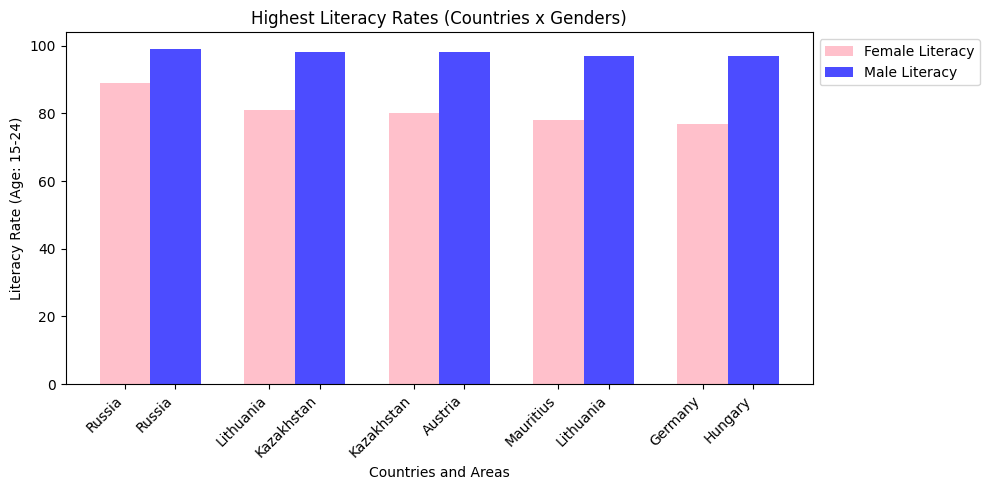

In [56]:
x_female = np.arange(len(top5FemaleLiteracy))
y_female = top5FemaleLiteracy['Female_Literacy_(Age: 15-24)']

# Extracting data for males
x_male = np.arange(len(top5MaleLiteracy))
y_male = top5MaleLiteracy['Male_Literacy_(Age: 15-24)']

# Creating the bar chart
bar_width = 0.35  # Adjust the width of the bars as needed
plt.figure(figsize=(10, 5))  # Adjust the figure size to make it taller

# Set colors for female and male bars
plt.bar(x_female, y_female, width=bar_width, label='Female Literacy', color='pink')
plt.bar(x_male + bar_width, y_male, width=bar_width, label='Male Literacy', color='blue', alpha=0.7)

# Adding labels and title
plt.xlabel('Countries and Areas')
plt.ylabel('Literacy Rate (Age: 15-24)')
plt.title('Highest Literacy Rates (Countries x Genders)')

# Adjusting x-axis ticks and labels
combined_x = np.concatenate([x_female, x_male + bar_width])
combined_labels = list(top5FemaleLiteracy['Countries_and_Areas']) + list(top5MaleLiteracy['Countries_and_Areas'])
plt.xticks(combined_x, combined_labels, rotation=45, ha='right')

# Placing legend outside to the right of the title in the upper-right corner
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust the parameters as needed

# Display the chart
plt.tight_layout()  # Adjust layout for better spacing
plt.show()